In [ ]:
[ 생각해볼 것 ]

1 ) OC

Counter({'open': 286, ' close': 15})

=> 데이터 불균형

2 ) sido => 충남, 충북 합해줄까 ? 

3 ) sgg  : 시군구 ? 인구수에 비례하여 병원이 많은지 ? 적은지 ? 

4 ) opendate : 개업일자

=> 폐업한 곳의 개업일자 살펴보기

5 ) bedCount : nan 채우기

6 ) instkind : 범주화

7 ) 나머지 : 각 column별로 17 - 16 의 변화 그려보기

In [ ]:
1. 결측치 아예 제거하고 돌려보기

2. 결측치 중 revenue1 ~ employee2 얘네는 병상 개수, 병원 종류에 따라 평균을 둔 뒤에 결측값 채워보기
1 ) 병상개수
* 수치형 : nan
    - 고용직원수에 따라 병상개수 예측 : max(employee1, employee2)의 상관관계가 0.55
* 범주형 : 병원 종류마다 범주화 종류가 달라야할까 ? 
    - nan 채운 뒤 어떻게 ? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')
testdf = pd.read_csv('./data/test.csv')

# 지수 표현 제거
pd.options.display.float_format = '{:.5f}'.format

# 기초 통계량 확인

## dataframe 정보

In [6]:
df.shape

(301, 58)

In [7]:
testdf.shape

(127, 58)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
inst_id               301 non-null int64
OC                    301 non-null object
sido                  301 non-null object
sgg                   301 non-null int64
openDate              301 non-null int64
bedCount              296 non-null float64
instkind              300 non-null object
revenue1              293 non-null float64
salescost1            293 non-null float64
sga1                  293 non-null float64
salary1               293 non-null float64
noi1                  293 non-null float64
noe1                  293 non-null float64
interest1             293 non-null float64
ctax1                 293 non-null float64
profit1               293 non-null float64
liquidAsset1          293 non-null float64
quickAsset1           293 non-null float64
receivableS1          293 non-null float64
inventoryAsset1       293 non-null float64
nonCAsset1            293 non-null float64
t

## 결측치 확인

In [9]:
df.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [12]:
df.loc[df['employee2'].isnull() == True, :]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
230,327,open,jeonnam,53,19990309,340.0,general_hospital,2.115853e+08,0.000000e+00,3.794506e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,461.0,NaN,same
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,NaN,NaN,NaN


In [11]:
df.loc[df['employee1'].isnull() == True, :]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
206,298,open,gyeongnam,32,20170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,NaN,NaN,NaN
285,407,open,gyeongbuk,160,19881104,119.0,hospital,9.618709e+09,0.000000e+00,9.751211e+09,...,4.416916e+09,1.524426e+09,0.000000e+00,2.892490e+09,5.462400e+08,4.902827e+09,0.0,NaN,NaN,NaN
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.0,NaN,NaN,NaN


In [10]:
df.loc[df['bedCount'].isnull() == True, :]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
193,281,close,gyeonggi,12,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.0,15.0,change
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [9]:
df.loc[df['instkind'].isnull() == True, :]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
193,281,close,gyeonggi,12,20121213,NaN,NaN,305438818.0,22416139.0,467475340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,change


In [2]:
xx = df.loc[df['revenue1'].isnull() == True, :]
xx

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,3,open,gyeongnam,32,19970401,410.00000,general_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,801.00000,813.00000,same
14,26,open,ulsan,127,20160531,237.00000,general_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,951.00000,901.00000,same
32,55,open,incheon,141,19930708,232.00000,general_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,323.00000,323.00000,same
55,87,open,gyeonggi,120,20130314,327.00000,nursing_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,200.00000,203.00000,same
60,94,open,gangwon,128,20031201,244.00000,nursing_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
248,353,open,gyeonggi,81,20040303,255.00000,general_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,255.00000,244.00000,same
257,362,open,choongnam,94,19861212,50.00000,nursing_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,93.00000,89.00000,same
258,363,open,gyeongbuk,95,20141219,0.00000,clinic,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


In [2]:
df.loc[df['ownerChange'].isnull() == True, :]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
206,298,open,gyeongnam,32,20170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,NaN,NaN,NaN
285,407,open,gyeongbuk,160,19881104,119.0,hospital,9.618709e+09,0.000000e+00,9.751211e+09,...,4.416916e+09,1.524426e+09,0.000000e+00,2.892490e+09,5.462400e+08,4.902827e+09,0.0,NaN,NaN,NaN


## 각 column 확인

### close data

In [74]:
from collections import Counter

def make(col_name) : 
    return Counter(df[col_name])

In [88]:
Counter(df['OC'])

Counter({'open': 286, ' close': 15})

In [15]:
closedf = df.loc[df['OC'] == ' close']
closedf

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.00000,nursing_hospital,2681765580.00000,180200922.00000,2014579640.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,51.00000,nan,change
71,107,close,jeonbuk,26,19990805,nan,traditional_hospital,4131857876.00000,143611800.00000,3529097014.00000,...,2658296224.00000,2632717442.00000,2442950671.00000,25578782.00000,0.00000,2487828487.00000,0.00000,85.00000,74.00000,same
93,140,close,gyeongbuk,114,20070420,203.00000,hospital,5423356760.00000,0.00000,5212041365.00000,...,2733619459.00000,140619459.00000,0.00000,2590000000.00000,2590000000.00000,3752184128.00000,0.00000,nan,nan,NaN
111,164,close,jeonbuk,136,20050321,326.00000,nursing_hospital,2179020670.00000,312206615.00000,1507567008.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,322.00000,320.00000,same
141,209,close,busan,63,19991112,151.00000,hospital,8845472370.00000,0.00000,7958490489.00000,...,14952433609.00000,10018105859.00000,6250000000.00000,4934327750.00000,4922327750.00000,250074032.00000,0.00000,110.00000,110.00000,same
158,238,close,jeonnam,19,20150316,119.00000,hospital,3581089010.00000,510641637.00000,2848303471.00000,...,5376395775.00000,2031395775.00000,298641726.00000,3350000000.00000,3350000000.00000,4221729241.00000,0.00000,64.00000,77.00000,change
177,265,close,jeonnam,53,20051111,652.00000,nursing_hospital,16831250640.00000,2372297826.00000,12345893902.00000,...,14305774437.00000,1682876791.00000,2521391.00000,12622897646.00000,7366341538.00000,16065435390.00000,0.00000,342.00000,278.00000,change
193,281,close,gyeonggi,12,20121213,nan,NaN,305438818.00000,22416139.00000,467475340.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.00000,15.00000,change
212,306,close,jeonnam,33,19990603,66.00000,nursing_hospital,22330305917.00000,848465677.00000,18492554091.00000,...,15632174080.00000,12881803375.00000,0.00000,2750370705.00000,0.00000,13849584833.00000,0.00000,nan,nan,NaN
214,309,close,seoul,36,20141226,0.00000,clinic,912525500.00000,58241510.00000,1012169282.00000,...,1035993678.00000,307547405.00000,0.00000,728446273.00000,728446273.00000,1679836883.00000,0.00000,16.00000,15.00000,change


In [127]:
# 17, 16년도의 변동 폭이 클까 ? 
closedf = df.loc[df['OC'] == ' close']
closedf['surplus1'] - closedf['surplus2']

35             0.00000
71             0.00000
93             0.00000
111   7720191107.00000
141            0.00000
158            0.00000
177            0.00000
193            0.00000
212            0.00000
214            0.00000
261            0.00000
290   6916619190.00000
297            0.00000
298            0.00000
299            0.00000
dtype: float64

### group별 surplus값

#### 병원 종류별

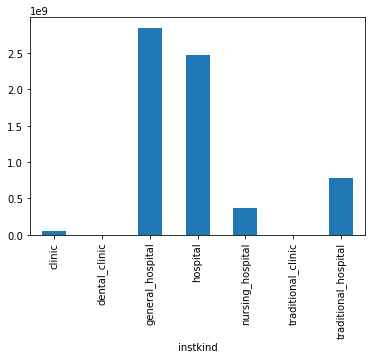

In [108]:
df.groupby(['instkind'])['surplus1'].mean().plot(kind='bar')

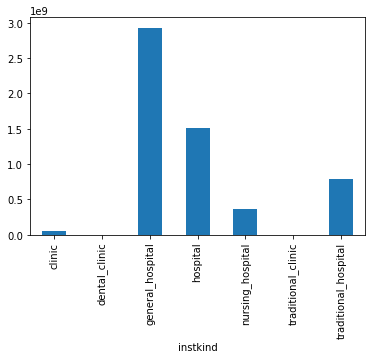

In [109]:
df.groupby(['instkind'])['surplus2'].mean().plot(kind='bar')

In [90]:
Counter(df['ownerChange'])
# close 데이터에 대해서
# 6 / 15 : 'ownerChange' , 4 / 15 : nan , 5 / 15 : same
# 16, 17년도의 영업순이익을 비교해 보았을 때 15개 중 2개만 영업순이익을 갖고 있다.

Counter({'same': 247, 'change': 42, nan: 12})

### 그냥 그려보기

In [130]:
cols = ['revenue', 'salescost', 'sga', 'salary', 'noi', 'noe',
       'interest', 'ctax', 'profit', 'liquidAsset', 'quickAsset',
       'receivableS', 'inventoryAsset', 'nonCAsset', 'tanAsset',
       'OnonCAsset', 'receivableL', 'debt', 'liquidLiabilities',
       'shortLoan', 'NCLiabilities', 'longLoan', 'netAsset', 'surplus']

In [148]:
newdf = []
for name in cols :
    ttmp = []
    for idx in df.index :
        tmp = df[name+str(2)][idx] - df[name+str(1)][idx]
        ttmp.append(tmp)
    newdf.append(ttmp)

In [156]:
newdf = pd.DataFrame(newdf).transpose()

In [174]:
newdf.columns = ['revenue', 'salescost', 'sga', 'salary', 'noi', 'noe',
       'interest', 'ctax', 'profit', 'liquidAsset', 'quickAsset',
       'receivableS', 'inventoryAsset', 'nonCAsset', 'tanAsset',
       'OnonCAsset', 'receivableL', 'debt', 'liquidLiabilities',
       'shortLoan', 'NCLiabilities', 'longLoan', 'netAsset', 'surplus']

<Figure size 864x720 with 0 Axes>

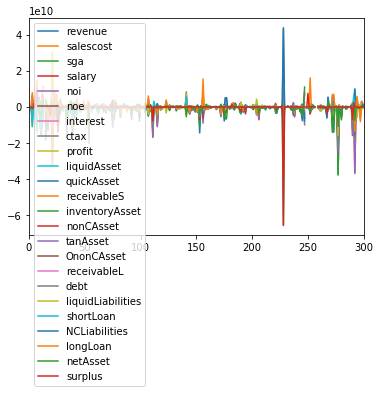

In [175]:
plt.figure(figsize=(12, 10))
newdf.plot()

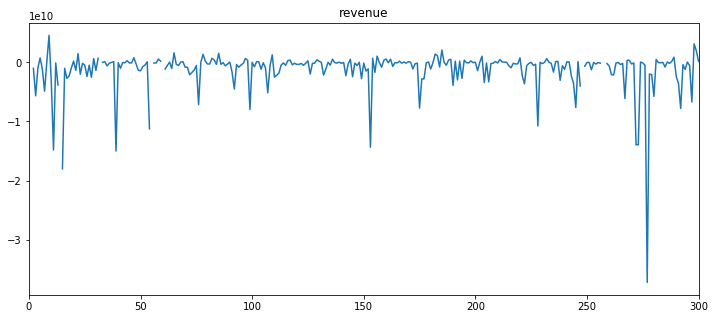

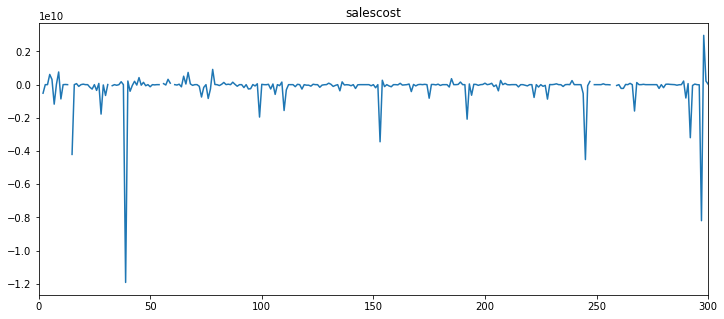

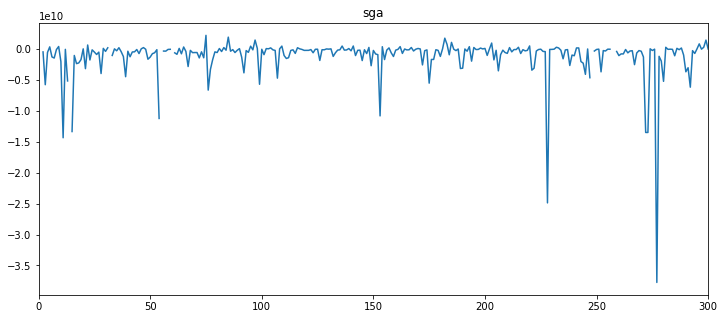

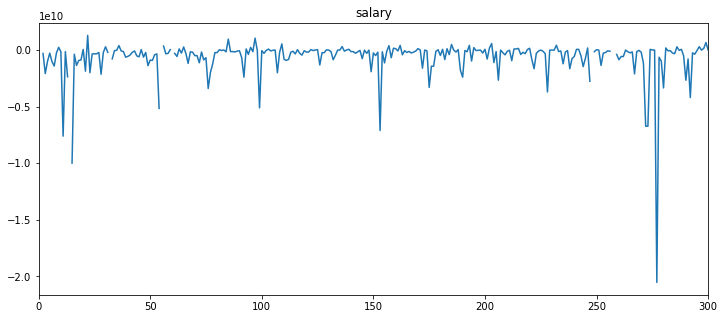

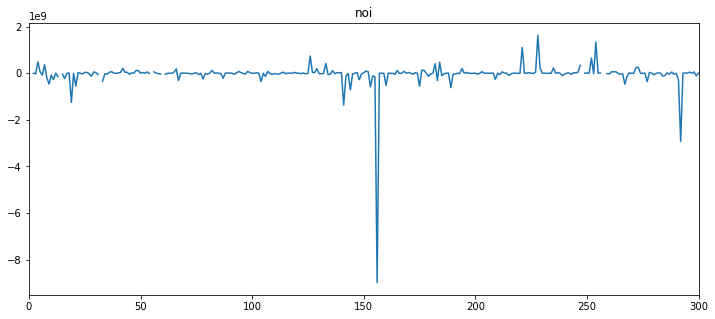

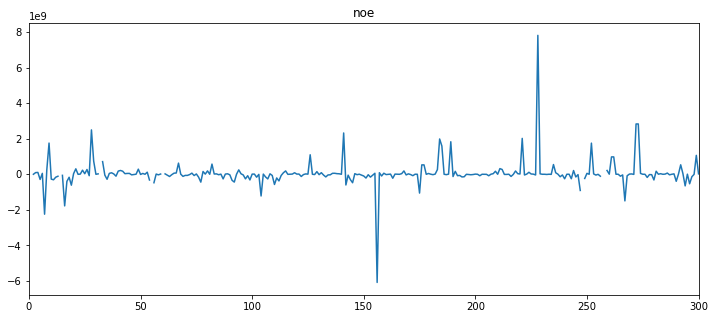

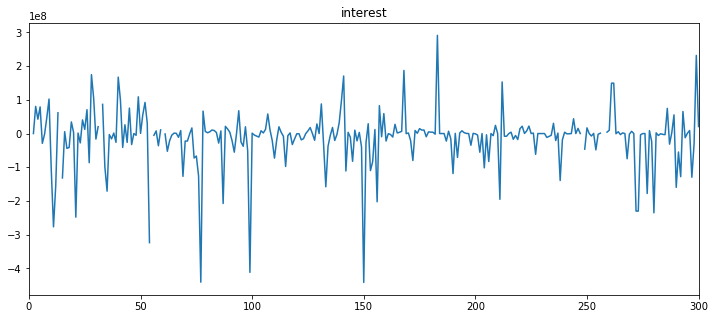

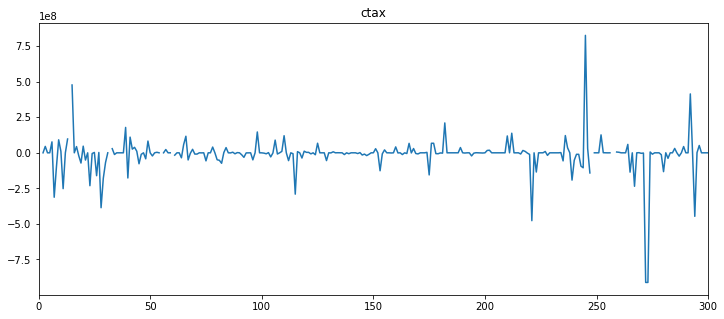

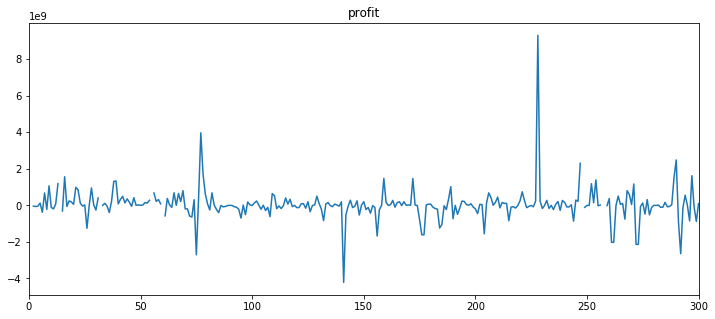

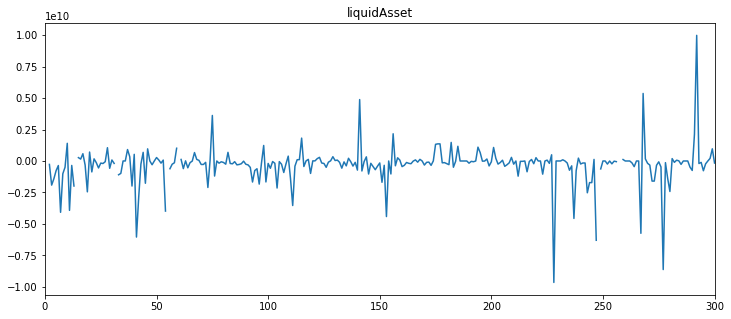

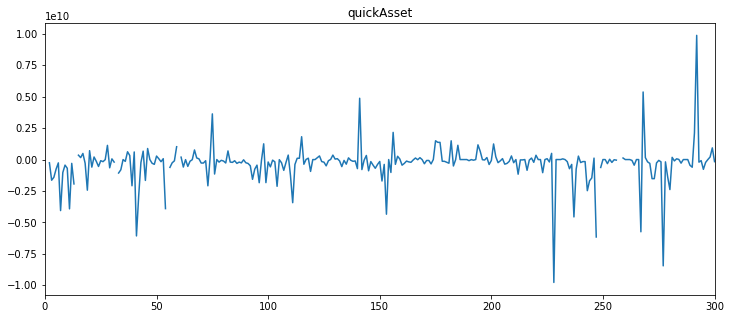

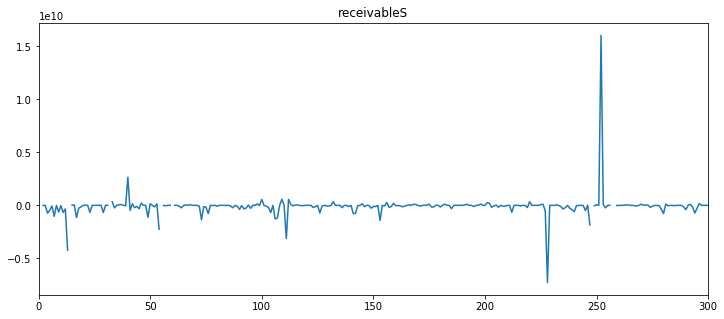

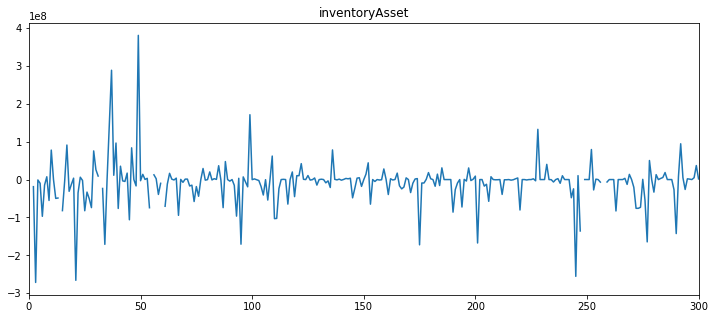

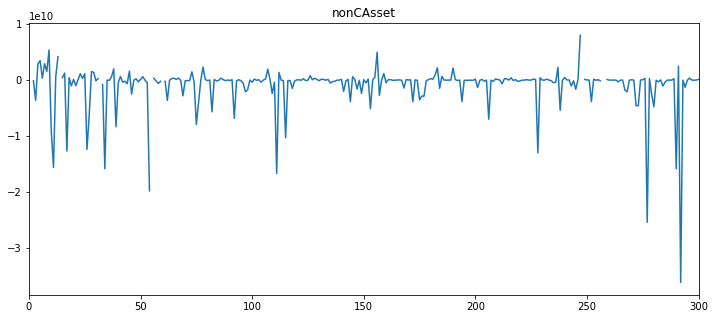

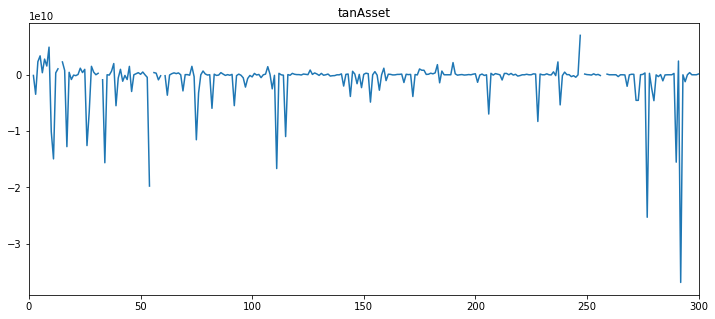

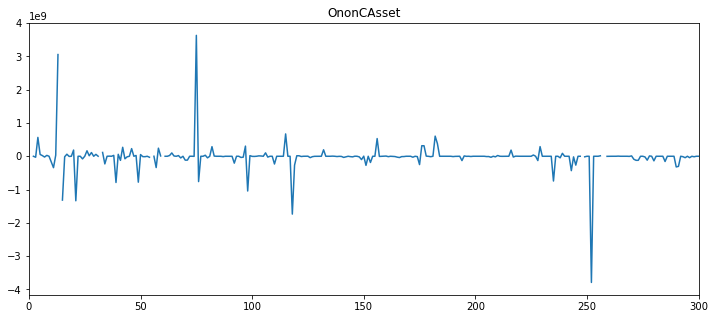

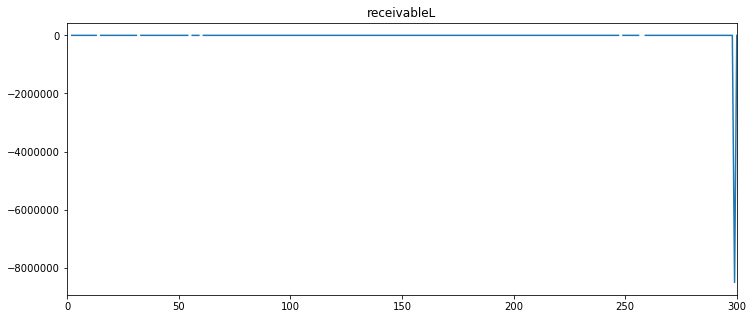

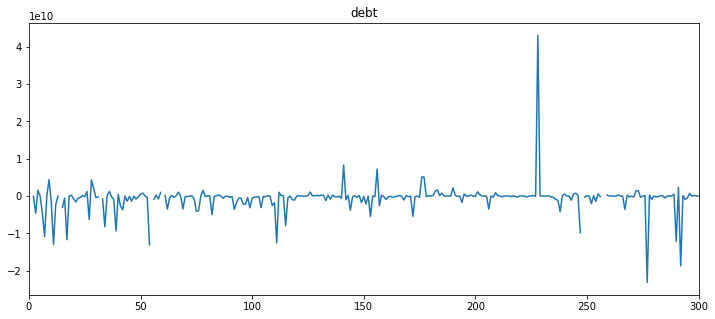

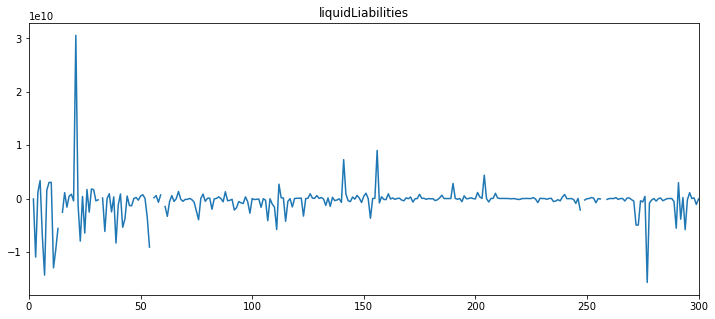

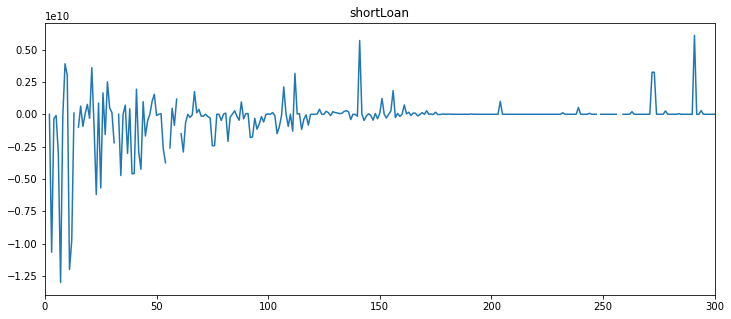

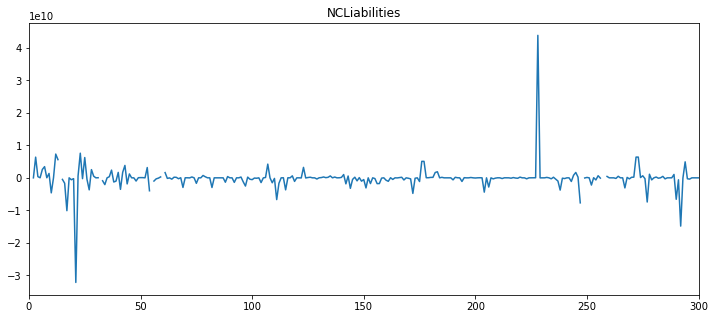

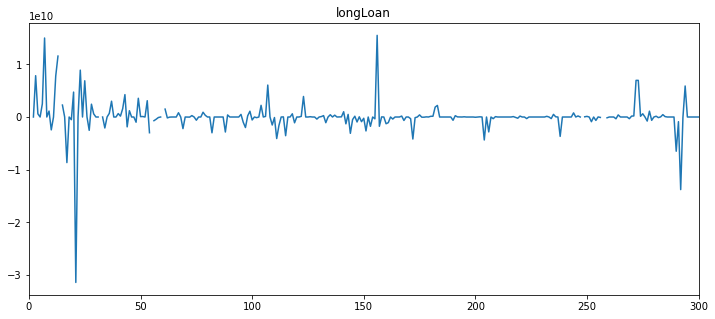

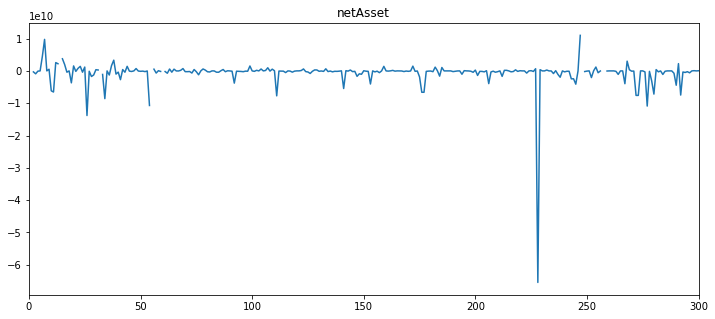

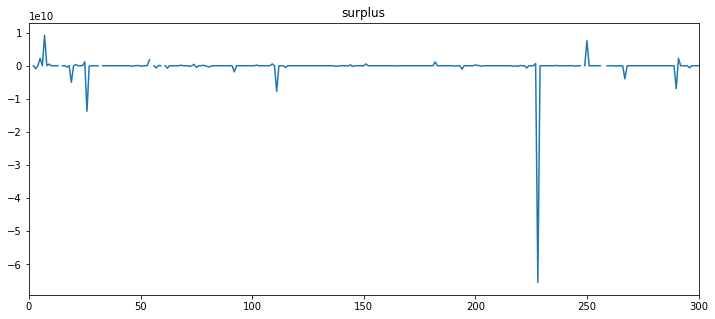

In [180]:
for i in newdf.columns :
    plt.figure(figsize=(12, 5))
    newdf.loc[:,i].plot()
    plt.title(i)
    plt.show()

# column

* inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

·        종합병원 : 입원환자 100명 이상 수용 가능

·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능

·        의원 : 입원 환자 30명 이하 수용 가능

·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관. 0

ownerChange – 대표자의 변동

1이 2017년, 2가 2016년


## 결측치 채워주기

* 병상개수, 병원 종류가 같은 곳의 평균값을 빈곳에 채워주자 revenue 1 ~~~

1 ) 병상개수 nan df

2 ) 아닌 df 는 병원 종류 grouping

3 ) train : 병상개수 nan 아닌 df의 max(employee1, employee2)

    predict : 병상개수 nan df

### 1 ) 병상개수 nan, nan아닌 df 생성

In [3]:
bedCount_nandf = df.loc[df['bedCount'].isnull(), : ]

In [4]:
bedCount_df = df.drop(bedCount_nandf.index)

### 2 ) employee1, employee2 와의 상관관계 살펴보기

In [5]:
bedCount_df[['inst_id','bedCount','employee1','employee2']] .corr()

,inst_id,bedCount,employee1,employee2
inst_id,1.00000,-0.20115,-0.18360,-0.23387
bedCount,-0.20115,1.00000,0.54903,0.51929
employee1,-0.18360,0.54903,1.00000,0.97354
employee2,-0.23387,0.51929,0.97354,1.00000


* train

In [6]:
df.loc[df['OC'] == 'open'].groupby(df['instkind']).mean()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
instkind,,,,,,,,,,,,,,,,,,,,,
clinic,271.70588,74.29412,20040722.29412,4.70588,18339861664.12500,9116122488.62500,8549328763.12500,2569290592.56250,126356150.00000,342802888.12500,...,0.00000,5300370403.75000,3415634461.75000,379261858.56250,1884985942.00000,539146702.06250,4448940725.00000,51648627.75000,89.06250,83.87500
dental_clinic,109.00000,79.00000,20120501.00000,0.00000,15472543033.00000,9405840570.00000,5046172942.00000,2268689456.00000,42491802.00000,403788486.00000,...,0.00000,12854804061.00000,5736049364.00000,2361425349.00000,7118754697.00000,7118754697.00000,5762838062.00000,0.00000,107.00000,109.00000
general_hospital,164.83333,79.13889,19970821.38889,263.27778,42938346277.37500,6935818000.15625,34932735643.40625,19624813058.65625,1028942538.37500,1609590487.25000,...,0.00000,26734046031.28125,13899455245.78125,5028724670.21875,13518376219.50000,6810055954.12500,14768131130.00000,3020268756.06250,414.33333,394.17143
hospital,212.68675,85.14458,20021714.48193,94.00000,13884962171.80723,1686050998.90361,11538428210.50602,6161557367.39759,273635058.03614,536577494.06024,...,0.00000,8973433613.93976,3655260967.22892,1587765132.36145,5318148550.32530,2753966478.55422,5845555992.65060,1598594714.02410,127.01235,117.02469
nursing_hospital,223.87770,80.19424,20088483.11511,168.78417,5924620309.75000,347728169.05882,5212944510.75735,3034021641.32353,135385697.16176,302259292.86029,...,0.00000,4337194466.54412,1939622485.65441,876654761.10294,2594592634.96324,2188024725.98529,3231501602.43382,369927831.01471,94.72993,90.75182
traditional_clinic,196.33333,64.33333,20063947.66667,0.00000,6617933300.33333,2690851471.00000,3610384016.66667,1990843490.00000,26263749.33333,140414603.33333,...,0.00000,2986456505.00000,2588898960.66667,2231373156.33333,397557544.33333,331964365.33333,2386138257.66667,0.00000,80.00000,81.00000
traditional_hospital,254.28571,61.85714,19998960.14286,46.66667,3966556581.57143,464822148.14286,3208824623.57143,1859422505.71429,26344026.85714,169469005.14286,...,0.00000,3759818962.28571,1824881457.00000,914026469.42857,1934937505.28571,1679223142.85714,2620367473.00000,895634285.71429,38.33333,35.50000


In [9]:
#bedCount_df.loc[bedCount_df['max_employee'].isnull(), ['OC','instkind','employee1', 'employee2']]

,OC,instkind,employee1,employee2


In [7]:
bedCount_df.loc[93, ['employee1','employee2']] = [84.33333, 88.66667] #close, hospital
bedCount_df.loc[212, ['employee1','employee2']] = [203.75000, 299.00000] # close, nursing_hospital

bedCount_df.loc[48, ['employee1','employee2']] = [38.33333,35.50000] # open, traditional_hospital
bedCount_df.loc[60, ['employee1','employee2']] = [94.72993,90.75182] # nursing_hospital
bedCount_df.loc[206, ['employee1','employee2']] = [94.72993,90.75182] # nursing_hospital
bedCount_df.loc[242, ['employee1','employee2']] = [80.00000,81.00000] # traditional_clinic
bedCount_df.loc[258, ['employee1','employee2']] = [89.06250,83.87500] # clinic
bedCount_df.loc[263, ['employee1','employee2']] = [127.01235,117.02469] # hospital
bedCount_df.loc[285, ['employee1','employee2']] = [127.01235,117.02469] # hospital

In [8]:
tmp = []
for row in bedCount_df.index :
    tmp.append(max(bedCount_df['employee1'][row],bedCount_df['employee2'][row]))
    
bedCount_df['max_employee'] = tmp

* test

In [9]:
# test로 사용할 데이터의 employee  값에 nan이 있기 때문에
# close data 중 hospital의 평균으로 mapping하자

df.loc[df['OC'] == ' close'].groupby(df['instkind']).mean() # 84.33333, 88.66667

bedCount_nandf.loc[298, ['employee1','employee2']] = [84.33333, 88.66667]
bedCount_nandf

C:\python\envs\cpu_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
71,107,close,jeonbuk,26,19990805,nan,traditional_hospital,4131857876.00000,143611800.00000,3529097014.00000,...,2658296224.00000,2632717442.00000,2442950671.00000,25578782.00000,0.00000,2487828487.00000,0.00000,85.00000,74.00000,same
193,281,close,gyeonggi,12,20121213,nan,NaN,305438818.00000,22416139.00000,467475340.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.00000,15.00000,change
297,423,close,choongnam,159,20140618,nan,hospital,6717143911.00000,8200000000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,79.00000,79.00000,same
298,426,close,gyeongbuk,107,19830705,nan,hospital,0.00000,0.00000,54794278.00000,...,6370097200.00000,2170972735.00000,0.00000,4199124465.00000,2498749346.00000,3259161079.00000,0.00000,84.33333,88.66667,NaN
300,428,open,seoul,79,20011017,nan,traditional_hospital,1340971077.00000,810845020.00000,504340856.00000,...,5349000469.00000,3123072057.00000,0.00000,2225928412.00000,2190000000.00000,5536177777.00000,6269440000.00000,15.00000,15.00000,same


In [11]:
tmp = []
for row in bedCount_nandf.index :
    tmp.append(max(bedCount_nandf['employee1'][row],bedCount_nandf['employee2'][row]))
    
bedCount_nandf['max_employee'] = tmp
bedCount_nandf

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,max_employee
71,107,close,jeonbuk,26,19990805,nan,traditional_hospital,4131857876.00000,143611800.00000,3529097014.00000,...,2632717442.00000,2442950671.00000,25578782.00000,0.00000,2487828487.00000,0.00000,85.00000,74.00000,same,85.00000
193,281,close,gyeonggi,12,20121213,nan,NaN,305438818.00000,22416139.00000,467475340.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.00000,15.00000,change,15.00000
297,423,close,choongnam,159,20140618,nan,hospital,6717143911.00000,8200000000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,79.00000,79.00000,same,79.00000
298,426,close,gyeongbuk,107,19830705,nan,hospital,0.00000,0.00000,54794278.00000,...,2170972735.00000,0.00000,4199124465.00000,2498749346.00000,3259161079.00000,0.00000,84.33333,88.66667,NaN,88.66667
300,428,open,seoul,79,20011017,nan,traditional_hospital,1340971077.00000,810845020.00000,504340856.00000,...,3123072057.00000,0.00000,2225928412.00000,2190000000.00000,5536177777.00000,6269440000.00000,15.00000,15.00000,same,15.00000


In [10]:
bedCount_df[['bedCount','employee1','employee2', 'max_employee']].corr() # max

,bedCount,employee1,employee2,max_employee
bedCount,1.00000,0.54533,0.51365,0.54460
employee1,0.54533,1.00000,0.97283,0.99804
employee2,0.51365,0.97283,1.00000,0.97644
max_employee,0.54460,0.99804,0.97644,1.00000


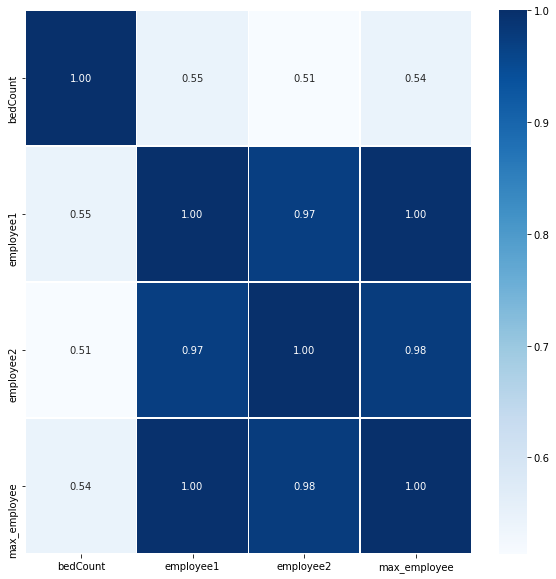

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data = bedCount_df[['bedCount','employee1','employee2', 'max_employee']].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 3 ) bedCount_nandf를 학습하여 bedCount_nandf의 bedCount 값 예측

#### a. max_employee만 사용

In [12]:
X_train = bedCount_df[['employee1']]
y_train = bedCount_df[['bedCount']]
X_test = bedCount_nandf[['employee1']]

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [14]:
prediction

array([[122.15142334],
       [ 93.54931704],
       [119.69981423],
       [121.87902097],
       [ 93.54931704]])

In [17]:
bedCount_nandf['bedCount'] = prediction

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


다시 합해줌

In [15]:
newdf = pd.concat([bedCount_df, bedCount_nandf]).sort_index(axis=0)

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
newdf.isnull().sum()

NCLiabilities1         8
NCLiabilities2         8
OC                     0
OnonCAsset1            8
OnonCAsset2            8
bedCount               5
ctax1                  8
ctax2                  8
debt1                  8
debt2                  8
employee1              0
employee2              4
inst_id                0
instkind               1
interest1              8
interest2              8
inventoryAsset1        8
inventoryAsset2        8
liquidAsset1           8
liquidAsset2           8
liquidLiabilities1     8
liquidLiabilities2     8
longLoan1              8
longLoan2              8
max_employee           5
netAsset1              8
netAsset2              8
noe1                   8
noe2                   8
noi1                   8
noi2                   8
nonCAsset1             8
nonCAsset2             8
openDate               0
ownerChange           12
profit1                8
profit2                8
quickAsset1            8
quickAsset2            8
receivableL1           8


### newdf 의 employee2 nan

In [17]:
newdf.loc[newdf['employee2'].isnull()]

,NCLiabilities1,NCLiabilities2,OC,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,...,sga1,sga2,sgg,shortLoan1,shortLoan2,sido,surplus1,surplus2,tanAsset1,tanAsset2
35,0.00000,0.00000,close,0.00000,0.00000,132.00000,0.00000,0.00000,0.00000,0.00000,...,2014579640.00000,1751389576.00000,168,0.00000,0.00000,gyeonggi,0.00000,0.00000,0.00000,0.00000
62,171881690.00000,0.00000,open,0.00000,0.00000,128.00000,0.00000,0.00000,3513950273.00000,0.00000,...,835577490.00000,0.00000,64,2918153230.00000,0.00000,busan,723119742.00000,0.00000,3629703850.00000,0.00000
230,0.00000,0.00000,open,0.00000,0.00000,340.00000,0.00000,0.00000,0.00000,0.00000,...,37945056.00000,0.00000,53,0.00000,0.00000,jeonnam,0.00000,0.00000,0.00000,0.00000
299,0.00000,0.00000,close,0.00000,0.00000,180.00000,0.00000,0.00000,580426781.00000,639233573.00000,...,3286244912.00000,4750651137.00000,169,0.00000,0.00000,gyeonggi,0.00000,0.00000,4441451040.00000,4441451040.00000


### newdf 의 ownerChange nan

In [19]:
242 / 278 * 8

6.9640287769784175

In [18]:
newdf.loc[newdf['ownerChange'].isnull()]
# 4 / 12 : close, 8 / 12 : open

,NCLiabilities1,NCLiabilities2,OC,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,...,sga1,sga2,sgg,shortLoan1,shortLoan2,sido,surplus1,surplus2,tanAsset1,tanAsset2
48,990000000.00000,2000000.00000,open,2200500.00000,25520500.00000,28.00000,72446781.00000,30218421.00000,6749131935.00000,5958277645.00000,...,7638919868.00000,7616309072.00000,1,4000000000.00000,4992758274.00000,seoul,0.00000,0.00000,8178953358.00000,8368728596.00000
60,nan,nan,open,nan,nan,244.00000,nan,nan,nan,nan,...,nan,nan,128,nan,nan,gangwon,nan,nan,nan,nan
62,171881690.00000,0.00000,open,0.00000,0.00000,128.00000,0.00000,0.00000,3513950273.00000,0.00000,...,835577490.00000,0.00000,64,2918153230.00000,0.00000,busan,723119742.00000,0.00000,3629703850.00000,0.00000
93,2590000000.00000,2590000000.00000,close,0.00000,0.00000,203.00000,11620200.00000,10915720.00000,4457666685.00000,2733619459.00000,...,5212041365.00000,4984086235.00000,114,1750000000.00000,0.00000,gyeongbuk,0.00000,0.00000,5438850237.00000,5290032847.00000
206,2830000000.00000,0.00000,open,8000000.00000,0.00000,160.00000,0.00000,0.00000,3478120846.00000,0.00000,...,3507971938.00000,0.00000,32,0.00000,0.00000,gyeongnam,0.00000,0.00000,6972698210.00000,0.00000
212,2967634744.00000,2750370705.00000,close,312415620.00000,310415620.00000,66.00000,415894516.00000,553752070.00000,15827363792.00000,15632174080.00000,...,18492554091.00000,18055026392.00000,33,0.00000,0.00000,jeonnam,0.00000,0.00000,12656386688.00000,11730061607.00000
242,370000.00000,370000.00000,open,270000000.00000,270000000.00000,0.00000,18640111.00000,8050806.00000,95280871.00000,69579598.00000,...,561935625.00000,756096906.00000,69,0.00000,0.00000,busan,0.00000,0.00000,502105779.00000,526808527.00000
258,nan,nan,open,nan,nan,0.00000,nan,nan,nan,nan,...,nan,nan,95,nan,nan,gyeongbuk,nan,nan,nan,nan
263,1539300000.00000,1351910000.00000,open,100700000.00000,100700000.00000,39.00000,0.00000,0.00000,1898374697.00000,1883430094.00000,...,2258240148.00000,2202888922.00000,100,0.00000,200000000.00000,gangwon,359919226.00000,226197450.00000,1999415782.00000,2001993768.00000
285,3210175385.00000,2892490007.00000,open,219444548.00000,62004548.00000,119.00000,21939910.00000,52706310.00000,4946246170.00000,4416916262.00000,...,9751211297.00000,8680638925.00000,160,0.00000,0.00000,gyeongbuk,0.00000,0.00000,4821054907.00000,4794284016.00000


In [47]:
newdf.loc[newdf['OC']=='open'].loc[newdf['ownerChange']=='same']

# 242 / 286 : same / open
# 36 / 286 : change / open
# 8 / 286 : nan / open

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,max_employee
0,1,open,choongnam,73,20071228,175.00000,nursing_hospital,4217530010.00000,0.00000,3961134739.00000,...,222876855.00000,0.00000,536116887.00000,390000000.00000,2619290493.00000,1271224493.00000,62.00000,64.00000,same,64.00000
1,3,open,gyeongnam,32,19970401,410.00000,general_hospital,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,801.00000,813.00000,same,813.00000
2,4,open,gyeonggi,89,20161228,468.00000,nursing_hospital,1004521989.00000,515483669.00000,447219722.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,234.00000,1.00000,same,234.00000
3,7,open,incheon,141,20000814,353.00000,general_hospital,72507342181.00000,0.00000,70677397660.00000,...,17018596586.00000,9219427379.00000,20736413926.00000,15100000000.00000,12954271998.00000,7740829037.00000,663.00000,663.00000,same,663.00000
4,9,open,gyeongnam,32,20050901,196.00000,general_hospital,49043538016.00000,0.00000,47656051197.00000,...,30072585842.00000,17593752360.00000,21360007048.00000,14108027465.00000,5561941.00000,9025549604.00000,206.00000,197.00000,same,206.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,418,open,gyeonggi,170,20120312,109.00000,hospital,4303269676.00000,242387555.00000,3455912256.00000,...,3092827638.00000,0.00000,1969746813.00000,1925500000.00000,2637783107.00000,0.00000,75.00000,70.00000,same,75.00000
294,419,open,gyeongnam,174,20101104,367.00000,nursing_hospital,12079632494.00000,530924107.00000,9521440239.00000,...,1101290705.00000,281323922.00000,6090000000.00000,5890000000.00000,9065227045.00000,0.00000,180.00000,180.00000,same,180.00000
295,420,open,gyeonggi,177,20110523,0.00000,nursing_hospital,5500472070.00000,0.00000,4883855221.00000,...,711398793.00000,0.00000,3233944557.00000,1800000000.00000,4337819255.00000,0.00000,62.00000,66.00000,same,66.00000
296,422,open,jeonnam,178,20050211,214.00000,nursing_hospital,7614696536.00000,415347464.00000,5903119133.00000,...,2618201328.00000,0.00000,6805569802.00000,5930000000.00000,5379501732.00000,811641602.00000,193.00000,141.00000,same,193.00000


In [20]:
20 / 11

1.8181818181818181

In [51]:
newdf.loc[newdf['OC']==' close'].loc[newdf['ownerChange']=='same']
# 5 / 15 : same / close
# 6 / 15 : change / close
# 4 / 15 : nan / close

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,max_employee
71,107,close,jeonbuk,26,19990805,122.15142,traditional_hospital,4131857876.00000,143611800.00000,3529097014.00000,...,2632717442.00000,2442950671.00000,25578782.00000,0.00000,2487828487.00000,0.00000,85.00000,74.00000,same,85.00000
111,164,close,jeonbuk,136,20050321,326.00000,nursing_hospital,2179020670.00000,312206615.00000,1507567008.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,322.00000,320.00000,same,322.00000
141,209,close,busan,63,19991112,151.00000,hospital,8845472370.00000,0.00000,7958490489.00000,...,10018105859.00000,6250000000.00000,4934327750.00000,4922327750.00000,250074032.00000,0.00000,110.00000,110.00000,same,110.00000
261,366,close,gyeonggi,98,20170120,0.00000,traditional_clinic,7162790357.00000,875894383.00000,5387361747.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,79.00000,70.00000,same,79.00000
297,423,close,choongnam,159,20140618,119.69981,hospital,6717143911.00000,8200000000.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,79.00000,79.00000,same,79.00000


### newdf 의 instkind nan
1 ) 종업원수에 따라 병원종류 범주화

2 ) instkind nan인 행 1개(193)의 종업원수 확인한 뒤,

3 ) 해당 범주 값 넣어주기

In [83]:
instkind_mapping = {
    'nursing_hospital' : 4,
    'general_hospital' : 4,
    'hospital' : 4,
    'traditional_hospital' : 3,
    'clinic' : 2,
    'traditional_clinic' : 1,
    'dental_clinic' : 1
}

In [90]:
newdf.groupby(['instkind']).mean()['bedCount']

instkind
clinic                   4.44444
dental_clinic            0.00000
general_hospital       261.56757
hospital                96.77930
nursing_hospital       172.34028
traditional_clinic       0.00000
traditional_hospital    61.96259
Name: bedCount, dtype: float64

In [85]:
newdf.iloc[193]

inst_id                           281
OC                              close
sido                         gyeonggi
sgg                                12
openDate                     20121213
bedCount                     93.54932
instkind                          NaN
revenue1              305438818.00000
salescost1             22416139.00000
sga1                  467475340.00000
salary1               254868810.00000
noi1                   13451554.00000
noe1                   90129732.00000
interest1               4239523.00000
ctax1                         0.00000
profit1              -261130839.00000
liquidAsset1                  0.00000
quickAsset1                   0.00000
receivableS1                  0.00000
inventoryAsset1               0.00000
nonCAsset1                    0.00000
tanAsset1                     0.00000
OnonCAsset1                   0.00000
receivableL1                  0.00000
debt1                         0.00000
liquidLiabilities1            0.00000
shortLoan1  